In [1]:
import pandas as pd
import matplotlib as plt

In [2]:
daily_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals (3).csv")
monthly_df = pd.read_csv("Resources/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals_2019.csv")

In [3]:
daily_df.head()

,station_id,stationname,date,daytype,rides
0,41240,Addison-O'Hare,1/1/2014,U,928
1,41310,Paulina,1/1/2014,U,1140
2,40290,Ashland/63rd,1/1/2014,U,641
3,41460,Irving Park-Brown,1/1/2014,U,999
4,40580,54th/Cermak,1/1/2014,U,641


In [4]:
monthly_df.head()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [5]:
#rename the columns for the daily df
daily_df = daily_df.rename(columns={'station_id': 'Station ID',
                        'stationame': 'Station Name',
                        'date': 'Date',
                        'daytype': 'Day Type',
                        'rides': 'Rides'})

In [6]:
#rename the columns for the monthly df
monthly_df = monthly_df.rename(columns={'station_id': 'Station ID',
                           'stationame': 'Station Name',
                           'month_beginning': 'Month Date',
                           'avg_weekday_rides': 'Average Weekday Rides',
                           'avg_saturday_rides': 'Average Saturday Rides',
                           'avg_sunday-holiday_rides': 'Average Sunday-Holiday Rides',
                           'monthtotal': 'Monthly Total'})

In [7]:
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total
0,40900,Howard,1/1/2014,5665.7,4130.3,3042.2,156378
1,41190,Jarvis,1/1/2014,1509.8,1363.0,1025.6,43795
2,40100,Morse,1/1/2014,3652.2,3075.5,2350.6,104404
3,41300,Loyola,1/1/2014,5831.0,4617.3,3299.8,163251
4,40760,Granville,1/1/2014,3834.7,3228.5,2403.2,109294


In [8]:
#january2014 = monthly_df.loc[monthly_df['Month'] == "1/1/2014"]

In [9]:
monthly_df['Month Date'] = pd.to_datetime(monthly_df['Month Date'])
monthly_df['Month Date']

0       2014-01-01
1       2014-01-01
2       2014-01-01
3       2014-01-01
4       2014-01-01
           ...    
12349   2021-02-01
12350   2021-02-01
12351   2021-02-01
12352   2021-02-01
12353   2021-02-01
Name: Month Date, Length: 12354, dtype: datetime64[ns]

In [10]:
monthly_df['Year'] = monthly_df['Month Date'].dt.year
monthly_df['Month'] = monthly_df['Month Date'].dt.month

In [11]:
monthly_df.head()

,Station ID,Station Name,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1
1,41190,Jarvis,2014-01-01,1509.8,1363.0,1025.6,43795,2014,1
2,40100,Morse,2014-01-01,3652.2,3075.5,2350.6,104404,2014,1
3,41300,Loyola,2014-01-01,5831.0,4617.3,3299.8,163251,2014,1
4,40760,Granville,2014-01-01,3834.7,3228.5,2403.2,109294,2014,1


In [12]:
lstops = pd.read_csv("Resources/CTA_-_System_Information_-_List_of__L__Stops.csv")
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,STATION_NAME,STATION_DESCRIPTIVE_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [13]:
lstops = lstops.rename(columns={'MAP_ID': 'Station ID',
                                'STATION_NAME': 'Station Name',
                           'STATION_DESCRIPTIVE_NAME': 'Line Color'})
lstops.head()

,STOP_ID,DIRECTION_ID,STOP_NAME,Station Name,Line Color,Station ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,30162,W,18th (54th/Cermak-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
1,30161,E,18th (Loop-bound),18th,18th (Pink Line),40830,True,False,False,False,False,False,False,False,True,False,"(41.857908, -87.669147)"
2,30022,N,35th/Archer (Loop-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
3,30023,S,35th/Archer (Midway-bound),35th/Archer,35th/Archer (Orange Line),40120,True,False,False,False,False,False,False,False,False,True,"(41.829353, -87.680622)"
4,30214,S,35-Bronzeville-IIT (63rd-bound),35th-Bronzeville-IIT,35th-Bronzeville-IIT (Green Line),41120,True,False,False,True,False,False,False,False,False,False,"(41.831677, -87.625826)"


In [14]:
merge_df = pd.merge(monthly_df, lstops, on = "Station ID")
merge_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,STOP_ID,...,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30173,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30174,...,True,False,False,False,False,False,False,False,False,"(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,30175,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,30176,...,False,False,False,False,True,True,True,False,False,"(42.019063, -87.672892)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,30383,...,False,False,True,True,False,False,False,False,False,"(41.88322, -87.626189)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,30384,...,False,False,True,False,False,True,False,True,True,"(41.88322, -87.626189)"


In [15]:
merge_df.columns

Index(['Station ID', 'Station Name_x', 'Month Date', 'Average Weekday Rides',
       'Average Saturday Rides', 'Average Sunday-Holiday Rides',
       'Monthly Total', 'Year', 'Month', 'STOP_ID', 'DIRECTION_ID',
       'STOP_NAME', 'Station Name_y', 'Line Color', 'ADA', 'RED', 'BLUE', 'G',
       'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O', 'Location'],
      dtype='object')

In [16]:
new_monthly_df = merge_df.drop(columns = ['STOP_ID', 'DIRECTION_ID', 'STOP_NAME', 'Station Name_y', 'ADA', 'RED', 'BLUE', 'G', 'BRN', 'P', 'Pexp', 'Y', 'Pnk', 'O'])
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)"
...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)"


In [17]:
new_monthly_df [["Station Name 2", "L Color"]] = new_monthly_df["Line Color"].str.split("(",expand=True)
new_monthly_df

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25689,41700,Washington/Wabash,2020-12-01,2313.1,1686.0,1079.0,63027,2020,12,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25690,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25691,41700,Washington/Wabash,2021-01-01,2159.1,1447.2,928.2,55986,2021,1,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"
25692,41700,Washington/Wabash,2021-02-01,2193.9,1506.8,937.8,53656,2021,2,"Washington/Wabash (Brown, Green, Orange, Purpl...","(41.88322, -87.626189)",Washington/Wabash,"Brown, Green, Orange, Purple & Pink Lines)"


In [18]:
df_2014 = new_monthly_df[new_monthly_df.Year==2014].copy()
df_2015 = new_monthly_df[new_monthly_df.Year==2015].copy()
df_2014.head()

,Station ID,Station Name_x,Month Date,Average Weekday Rides,Average Saturday Rides,Average Sunday-Holiday Rides,Monthly Total,Year,Month,Line Color,Location,Station Name 2,L Color
0,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
1,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
2,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
3,40900,Howard,2014-01-01,5665.7,4130.3,3042.2,156378,2014,1,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"
4,40900,Howard,2014-02-01,6334.2,4197.3,3195.5,156254,2014,2,"Howard (Red, Purple & Yellow Lines)","(42.019063, -87.672892)",Howard,"Red, Purple & Yellow Lines)"


In [19]:
len(df_2014)

3552

In [22]:
df_viz = pd.concat([df_2014['L Color'].value_counts(),df_2015['L Color'].value_counts()],axis=1)
df_viz.columns = ['2014','2015']
df_viz.head()

,2014,2015
Red Line),696,696
Blue Line),672,672
Green Line),504,528
Pink Line),264,264
Brown Line),264,264


<AxesSubplot:>

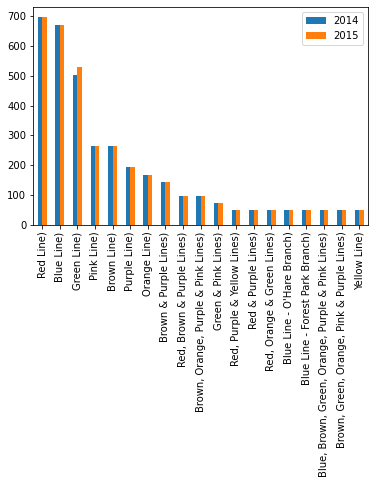

In [23]:
df_viz.plot.bar()